<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(_4)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-4'

In [4]:
os.listdir(base_path)

['data_add_delta_-4_n250.csv',
 'data_add_delta_-4_n120.csv',
 'data_add_delta_-4_n60.csv',
 'data_add_delta_-4_n30.csv',
 'data_add_delta_-4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.906903,31.595166,52.489361,-0.001141,167.990289,167.991307,-0.001018
1,0.0,1.0,53.079484,51.410705,42.796206,-0.000426,157.285969,157.286389,-0.000420
2,0.0,2.0,61.008578,97.286106,77.688370,0.000034,245.983089,245.983059,0.000030
3,0.0,3.0,97.392749,93.657038,34.723203,-0.000295,235.772696,235.772828,-0.000133
4,0.0,4.0,60.728577,29.748769,42.552753,0.001368,143.031467,143.030034,0.001432
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,68.731412,74.410089,96.458263,0.000012,249.599777,249.599555,0.000222
119996,999.0,116.0,95.882264,74.547430,66.740779,-0.000061,247.170411,247.170487,-0.000076
119997,999.0,117.0,90.476476,30.829018,43.822291,-0.000286,175.127498,175.127830,-0.000331
119998,999.0,118.0,88.871485,28.919964,88.940496,-0.000283,216.731661,216.731713,-0.000051


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.906903,31.595166,52.489361,-0.001141,167.990289,167.991307,-0.001018
1,0.0,1.0,53.079484,51.410705,42.796206,-0.000426,157.285969,157.286389,-0.000420
2,0.0,2.0,61.008578,97.286106,77.688370,0.000034,245.983089,245.983059,0.000030
3,0.0,3.0,97.392749,93.657038,34.723203,-0.000295,235.772696,235.772828,-0.000133
4,0.0,4.0,60.728577,29.748769,42.552753,0.001368,143.031467,143.030034,0.001432
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,68.731412,74.410089,96.458263,0.000012,249.599777,249.599555,0.000222
119996,999.0,116.0,95.882264,74.547430,66.740779,-0.000061,247.170411,247.170487,-0.000076
119997,999.0,117.0,90.476476,30.829018,43.822291,-0.000286,175.127498,175.127830,-0.000331
119998,999.0,118.0,88.871485,28.919964,88.940496,-0.000283,216.731661,216.731713,-0.000051


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    73.906903  31.595166  52.489361 -0.001141  167.990289   
      1.0    53.079484  51.410705  42.796206 -0.000426  157.285969   
      2.0    61.008578  97.286106  77.688370  0.000034  245.983089   
      3.0    97.392749  93.657038  34.723203 -0.000295  235.772696   
      4.0    60.728577  29.748769  42.552753  0.001368  143.031467   
...                ...        ...        ...       ...         ...   
999.0 115.0  68.731412  74.410089  96.458263  0.000012  249.599777   
      116.0  95.882264  74.547430  66.740779 -0.000061  247.170411   
      117.0  90.476476  30.829018  43.822291 -0.000286  175.127498   
      118.0  88.871485  28.919964  88.940496 -0.000283  216.731661   
      119.0  26.131860  55.076406  43.086139 -0.000288  134.294117   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    167.991307 -0.001018  
      1.0    157.286389 -0.000420  
      2.0    245.983059  0.000030  
      3.0    235.772828 -0.000133  
      4.0    143.030034  0.001432  
...                 ...       ...  
999.0 115.0  249.599555  0.000222  
      116.0  247.170487 -0.000076  
      117.0  175.127830 -0.000331  
      118.0  216.731713 -0.000051  
      119.0  134.294400 -0.000283  

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    73.906903  31.595166  52.489361 -0.001141  167.990289   
      1.0    53.079484  51.410705  42.796206 -0.000426  157.285969   
      2.0    61.008578  97.286106  77.688370  0.000034  245.983089   
      3.0    97.392749  93.657038  34.723203 -0.000295  235.772696   
      4.0    60.728577  29.748769  42.552753  0.001368  143.031467   
...                ...        ...        ...       ...         ...   
999.0 115.0  68.731412  74.410089  96.458263  0.000012  249.599777   
      116.0  95.882264  74.547430  66.740779 -0.000061  247.170411   
      117.0  90.476476  30.829018  43.822291 -0.000286  175.127498   
      118.0  88.871485  28.919964  88.940496 -0.000283  216.731661   
      119.0  26.131860  55.076406  43.086139 -0.000288  134.294117   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    167.991307 -0.001018  
      1.0    157.286389 -0.000420  
      2.0    245.983059  0.000030  
      3.0    235.772828 -0.000133  
      4.0    143.030034  0.001432  
...                 ...       ...  
999.0 115.0  249.599555  0.000222  
      116.0  247.170487 -0.000076  
      117.0  175.127830 -0.000331  
      118.0  216.731713 -0.000051  
      119.0  134.294400 -0.000283  

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.906903,31.595166,52.489361,-0.001141,167.990289,167.991307,-0.001018
1,0.0,1.0,53.079484,51.410705,42.796206,-0.000426,157.285969,157.286389,-0.000420
2,0.0,2.0,61.008578,97.286106,77.688370,0.000034,245.983089,245.983059,0.000030
3,0.0,3.0,97.392749,93.657038,34.723203,-0.000295,235.772696,235.772828,-0.000133
4,0.0,4.0,60.728577,29.748769,42.552753,0.001368,143.031467,143.030034,0.001432
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,68.731412,74.410089,96.458263,0.000012,249.599777,249.599555,0.000222
119996,999.0,116.0,95.882264,74.547430,66.740779,-0.000061,247.170411,247.170487,-0.000076
119997,999.0,117.0,90.476476,30.829018,43.822291,-0.000286,175.127498,175.127830,-0.000331
119998,999.0,118.0,88.871485,28.919964,88.940496,-0.000283,216.731661,216.731713,-0.000051


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    73.906903  31.595166  52.489361 -0.001141  167.990289   
      1.0    53.079484  51.410705  42.796206 -0.000426  157.285969   
      2.0    61.008578  97.286106  77.688370  0.000034  245.983089   
      3.0    97.392749  93.657038  34.723203 -0.000295  235.772696   
      4.0    60.728577  29.748769  42.552753  0.001368  143.031467   
...                ...        ...        ...       ...         ...   
999.0 115.0  68.731412  74.410089  96.458263  0.000012  249.599777   
      116.0  95.882264  74.547430  66.740779 -0.000061  247.170411   
      117.0  90.476476  30.829018  43.822291 -0.000286  175.127498   
      118.0  88.871485  28.919964  88.940496 -0.000283  216.731661   
      119.0  26.131860  55.076406  43.086139 -0.000288  134.294117   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    167.991307 -0.001018  
      1.0    157.286389 -0.000420  
      2.0    245.983059  0.000030  
      3.0    235.772828 -0.000133  
      4.0    143.030034  0.001432  
...                 ...       ...  
999.0 115.0  249.599555  0.000222  
      116.0  247.170487 -0.000076  
      117.0  175.127830 -0.000331  
      118.0  216.731713 -0.000051  
      119.0  134.294400 -0.000283  

[120000 rows x 7 columns]

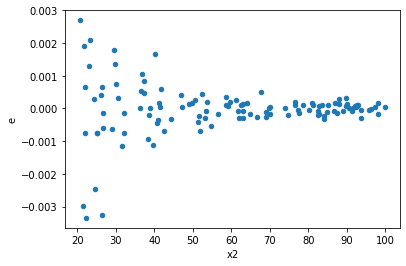

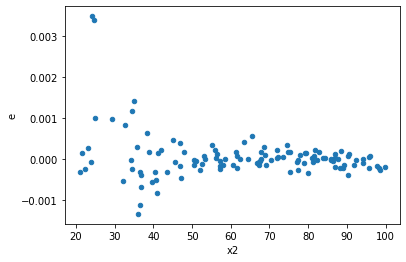

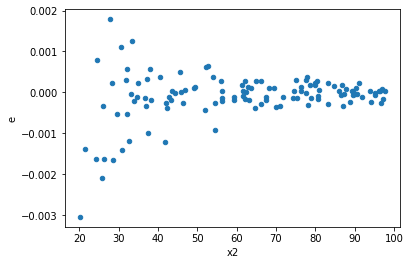

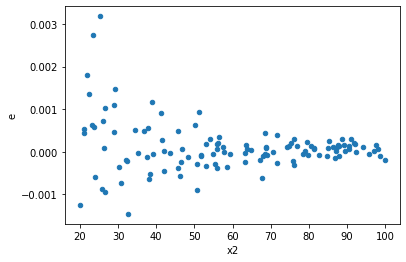

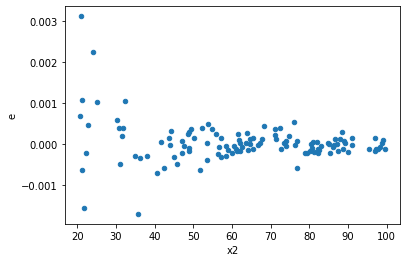

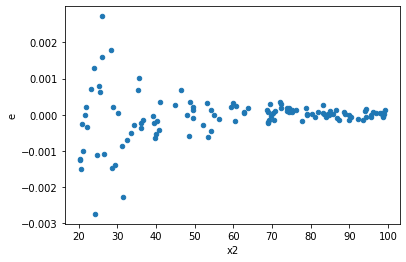

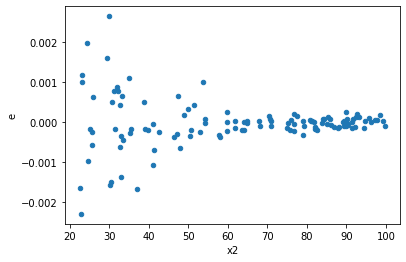

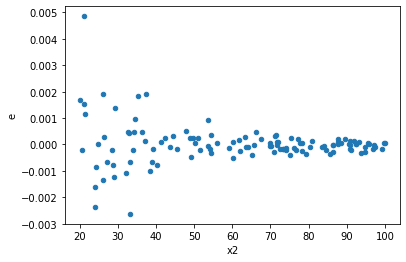

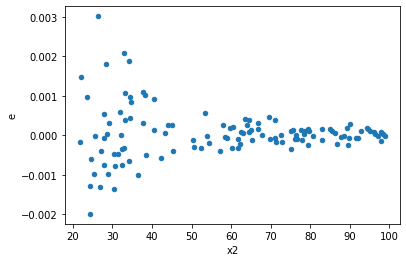

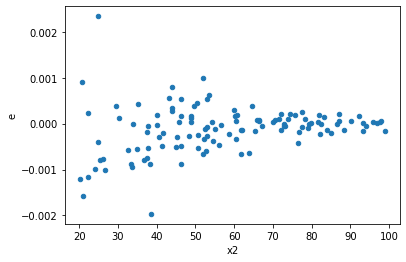

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
24.0,45.0,45.0,1.9409889954000264e-05,2.352956076754573e-05,4.3133088786667254e-07,5.228791281676829e-07,1.212245964470109,0.5211900094926372,0.7394049952536814,0.2605950047463186,Reject005=1 : Homoscedasticity
75.0,45.0,45.0,1.7699732581362775e-05,1.9250413180717617e-05,3.9332739069695056e-07,4.277869595715026e-07,1.0876103970625892,0.7794114142311277,0.6102942928844362,0.38970570711556385,Reject005=1 : Homoscedasticity
181.0,45.0,45.0,1.8119627519910563e-05,1.879670732039171e-05,4.0265838933134586e-07,4.177046071198158e-07,1.0373672030364391,0.9026112120558465,0.5486943939720768,0.45130560602792325,Reject005=1 : Homoscedasticity
196.0,45.0,45.0,1.79747389300923e-05,5.01095341558247e-05,3.9943864289094e-07,1.1135452034627711e-06,2.7877753524383118,0.0008099826166856339,0.9995950086916572,0.00040499130834281694,Reject005=0 : Heteroscedasticity
269.0,45.0,45.0,2.0446983917148704e-05,2.242835631987701e-05,4.5437742038108233e-07,4.984079182194891e-07,1.096902917846311,0.7577399552021951,0.6211300223989025,0.37886997760109753,Reject005=1 : Homoscedasticity
328.0,45.0,45.0,2.6142277119179266e-05,4.204548940591538e-05,5.809394915373171e-07,9.343442090203418e-07,1.608333092570147,0.11463181876411555,0.9426840906179422,0.05731590938205777,Reject005=1 : Homoscedasticity
382.0,45.0,45.0,9.201600917006578e-06,1.0298122471737459e-05,2.0448002037792395e-07,2.288471660386102e-07,1.1191663890469612,0.7073420622022664,0.6463289688988668,0.3536710311011332,Reject005=1 : Homoscedasticity
441.0,45.0,45.0,1.1881020230570774e-05,1.806580267468476e-05,2.6402267179046163e-07,4.0146228165966133e-07,1.520559878199691,0.16367744410462914,0.9181612779476854,0.08183872205231457,Reject005=1 : Homoscedasticity
568.0,45.0,45.0,1.5184632971846694e-05,2.2569003248782618e-05,3.3743628826325987e-07,5.015334055285026e-07,1.4863054833545883,0.18764349150246762,0.9061782542487662,0.09382174575123381,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,3.6794412326044876e-05,6.970689020416277e-06,8.176536072454417e-07,1.5490420045369505e-07,0.18944966313491257,1.3451768294045483e-07,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,2.523388854137078e-05,4.824855358910906e-06,5.607530786971285e-07,1.0721900797579792e-07,0.19120538441788668,1.554340272043139e-07,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,1.5212297049581394e-05,9.135079948705266e-06,3.380510455462532e-07,2.0300177663789478e-07,0.6005062824457954,0.0906416209069596,Reject005=1 : Homoscedasticity
3.0,45.0,45.0,2.3370818445501975e-05,3.6322315594224555e-06,5.19351521011155e-07,8.071625687605457e-08,0.1554173880513597,5.40920977072227e-09,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,2.4871130345321548e-05,2.6999839905597466e-06,5.5269178545159e-07,5.999964423466104e-08,0.10855895783874715,9.939222197393848e-12,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,2.681353836800726e-05,3.470201197859546e-06,5.958564081779391e-07,7.711558217465657e-08,0.1294197412602597,2.332013944774704e-10,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,3.539304993025647e-05,6.633974106034994e-06,7.865122206723659e-07,1.4742164680077764e-07,0.18743719795574346,1.1372435247868877e-07,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,5.56339847551751e-05,2.9254623261628346e-06,1.2363107723372246e-06,6.501027391472966e-08,0.05258408756871772,7.594753476129213e-18,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,3.366238855963364e-05,1.0004218285439811e-05,7.480530791029697e-07,2.2231596189866247e-07,0.2971927636007506,8.386599197916713e-05,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    946
Reject005=1 : Homoscedasticity       54
Name: Result_test, dtype: int64